In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

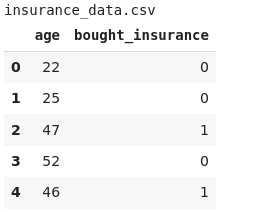

In [4]:
df = pd.read_csv("insurance_data.csv")
print('insurance_data.csv')
df.head()


insurance_data.csv


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


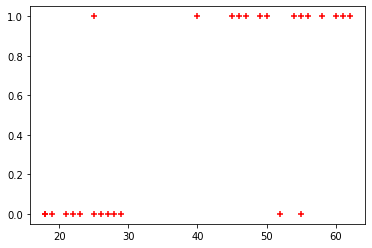

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [8]:
X_test

,age
12,27
21,26
3,52
15,55
6,55
1,25


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_predicted = model.predict(X_test)

In [13]:
model.predict_proba(X_test)

array([[7.56626615e-01, 2.43373385e-01],
       [8.08190533e-01, 1.91809467e-01],
       [1.55258005e-03, 9.98447420e-01],
       [6.24240651e-04, 9.99375759e-01],
       [6.24240651e-04, 9.99375759e-01],
       [8.50981202e-01, 1.49018798e-01]])

In [14]:
model.score(X_test,y_test)

0.6666666666666666

In [15]:
y_predicted

array([0, 0, 1, 1, 1, 0])

In [16]:
X_test

,age
12,27
21,26
3,52
15,55
6,55
1,25


In [17]:
# model.coef_ indicates value of m in y=m*x + b equation
model.coef_

array([[0.30402226]])

In [18]:
# model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

array([-9.34287404])

In [19]:
# Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [20]:
def prediction_function(age):
  z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
  y = sigmoid(z)
  return y

In [21]:
age = 35
prediction_function(age)

0.4850044983805899

Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics
(https://www.kaggle.com/giripujar/hr-analytics).
1. Now do some exploratory data analysis to figure out which variables have direct and clear
impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model